<a href="https://colab.research.google.com/github/markefuller/CAP4630/blob/master/HW2/hw2problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mark E Fuller
UCF CAP 4630 Fall 2019

**Homework 2 Problem 2:**

Modify the network architecture in [the notebook for classifying MNIST fashion items](https://colab.research.google.com/drive/1TTO7P5GTmsHhIt_YGqZYyw4KGBCnjqyW) with dense layers and analyzing model performance by varying the number of hidden layers and choosing different sizes for the hidden layers.

Give three models consisting of only dense layers that

•	first model underfits (the model is too simple and cannot explain the data)

•	second model overfits (the model is unnecessarily complex so it can easily adapt too much to the training data)

•	third is pretty good (the model is either too simple, nor too complex; you don't train for too many epochs; you use dropout to fight overfitting)

Make sure that you plot the curves depicting the training/validation accuracy/loss.


# Exploring the MNIST Fashion Data Set

## Loading the MNIST fashion data set

In [0]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Find GPU Model Assigned by Colab
# Tesla P100 cost $5,600
# Tesla T4 cost $2,700
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

4423680/4422102 [==============================] - 0s 0us/step
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14344350583294778022
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4807579413606523059
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 1602894672568577248
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15956161332
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3123234629827479445
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


## Exploring the format of the MNIST fashion data set

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_images)

60000

In [0]:
train_images.ndim

3

In [0]:
train_images.dtype

dtype('uint8')

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
len(train_labels)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Displaying some MNIST fashion items

In [0]:
import matplotlib.pyplot as plt
import numpy as np

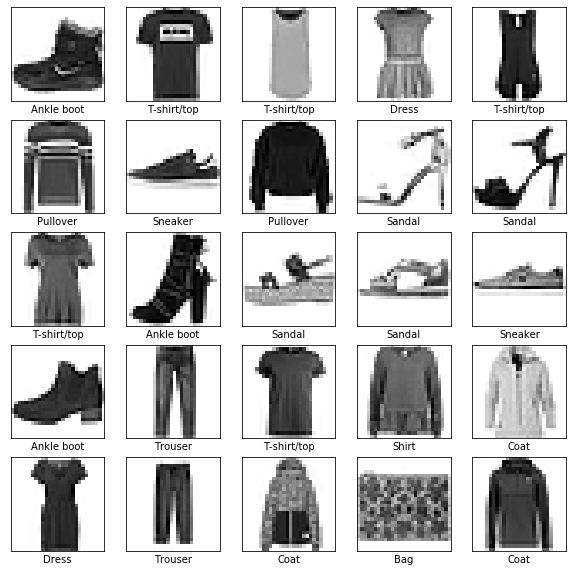

In [0]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

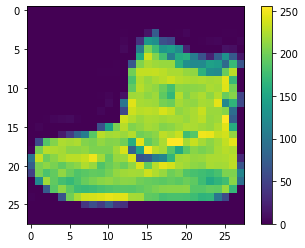

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Underfit Example

## Build the model

In [0]:
# set up the layers

# Changed units of dense layer units from 128 to 6, less than number of activation values
# Changed epochs from 20 to 6
model_underfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(0.6, input_shape=(28,28)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model_underfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 8
history = model_underfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 5s 89us/sample - loss: 1.1817 - acc: 0.5869 - val_loss: 0.7792 - val_acc: 0.7281
Epoch 2/8
60000/60000 [==============================] - 4s 74us/sample - loss: 0.7844 - acc: 0.7169 - val_loss: 0.6874 - val_acc: 0.7547
Epoch 3/8
60000/60000 [==============================] - 5s 76us/sample - loss: 0.7416 - acc: 0.7323 - val_loss: 0.6726 - val_acc: 0.7722
Epoch 4/8
60000/60000 [==============================] - 5s 77us/sample - loss: 0.7190 - acc: 0.7400 - val_loss: 0.6489 - val_acc: 0.7655
Epoch 5/8
60000/60000 [==============================] - 5s 77us/sample - loss: 0.7110 - acc: 0.7428 - val_loss: 0.6343 - val_acc: 0.7817
Epoch 6/8
60000/60000 [==============================] - 5s 76us/sample - loss: 0.7021 - acc: 0.7473 - val_loss: 0.6278 - val_acc: 0.7800
Epoch 7/8
60000/60000 [==================

## Evaluate accuracy

In [0]:
test_loss, test_acc = model_underfit.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.6221 - acc: 0.7857
Test accuracy: 0.7857


It turns out, the accuracy on the test dataset is greater than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy is an example of **underfitting**. Underfitting is the case where the model has “ not learned enough” from the training data, resulting in low generalization and unreliable predictions.



## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

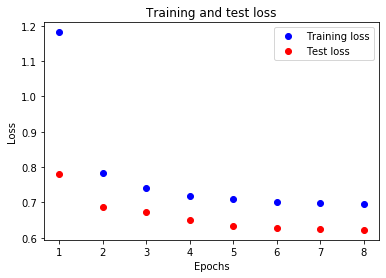

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

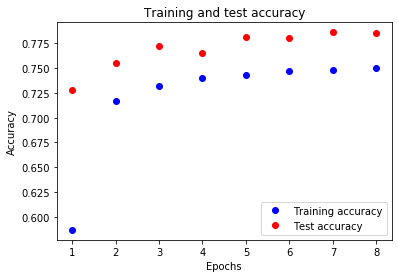

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Overfit Example

## Build the model

In [0]:
# set up the layers

# Changed units of Dense layer from 128 to 512
# Changed epochs from 20 to 40
model_overfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model_overfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 40
history = model_overfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4723 - acc: 0.8316 - val_loss: 0.4107 - val_acc: 0.8559
Epoch 2/40
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3594 - acc: 0.8690 - val_loss: 0.3775 - val_acc: 0.8658
Epoch 3/40
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3229 - acc: 0.8806 - val_loss: 0.3836 - val_acc: 0.8606
Epoch 4/40
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3003 - acc: 0.8886 - val_loss: 0.3640 - val_acc: 0.8691
Epoch 5/40
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2829 - acc: 0.8943 - val_loss: 0.3436 - val_acc: 0.8732
Epoch 6/40
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2694 - acc: 0.8983 - val_loss: 0.3180 - val_acc: 0.8879
Epoch 7/40
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2537 - acc: 0.9048 - val_loss: 0.

## Evaluate accuracy

In [0]:
test_loss, test_acc = model_overfit.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.4954 - acc: 0.8877
Test accuracy: 0.8877


It turns out, the accuracy on the test dataset is much less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy is an example of **overfitting**. Overfitting is when a machine learning model performs worse on new data than on their training data.



## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

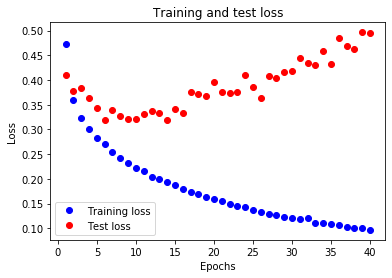

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

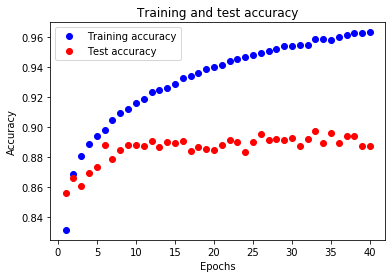

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Good fit Example

## Build the model

In [0]:
# set up the layers

# Changed dense layer units to 600 from 128
# Changed epochs to 12 from 20
model_goodfit = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(.5),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(.5),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model_goodfit.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 10
history = model_goodfit.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.7733 - acc: 0.7114 - val_loss: 0.5338 - val_acc: 0.8160
Epoch 2/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.5220 - acc: 0.8215 - val_loss: 0.4683 - val_acc: 0.8336
Epoch 3/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.4700 - acc: 0.8422 - val_loss: 0.4198 - val_acc: 0.8520
Epoch 4/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.4358 - acc: 0.8546 - val_loss: 0.4337 - val_acc: 0.8445
Epoch 5/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.4182 - acc: 0.8599 - val_loss: 0.4067 - val_acc: 0.8563
Epoch 6/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3999 - acc: 0.8653 - val_loss: 0.3993 - val_acc: 0.8587
Epoch 7/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.3931 - acc: 0.8660 - val_loss: 0.

## Evaluate accuracy

In [0]:
test_loss, test_acc = model_goodfit.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 50us/sample - loss: 0.3857 - acc: 0.8691
Test accuracy: 0.8691


Test accuracy is close to training accuracy



## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

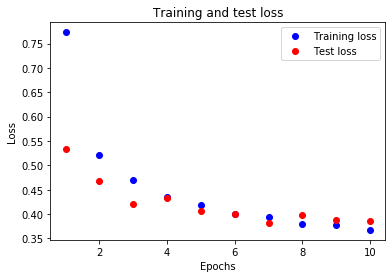

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

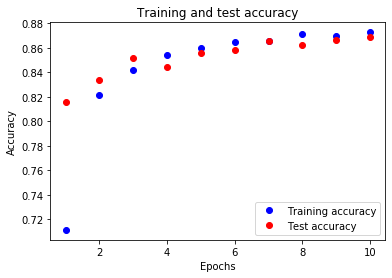

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()